In [1]:
import pandas as pd

In [2]:
url = "https://stooq.pl/q/d/l/?s=cdr&d1=20200101&d2=20220114&i=d"
df = pd.read_csv(url, parse_dates=True, index_col="Data")
df.head(20)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-01-02,274.10,278.77,273.13,278.77,172311
2020-01-03,278.96,281.69,273.23,277.99,251004
2020-01-07,279.06,280.33,274.98,275.85,218998
2020-01-08,275.56,275.85,269.54,273.23,230932
2020-01-09,276.05,280.52,275.08,280.52,200512
2020-01-10,281.39,284.50,276.53,277.02,272232
2020-01-13,279.74,282.46,276.24,282.46,215140
2020-01-14,282.37,283.63,278.19,280.42,277487
2020-01-15,281.30,281.49,274.78,275.27,270283


<AxesSubplot:xlabel='Data'>

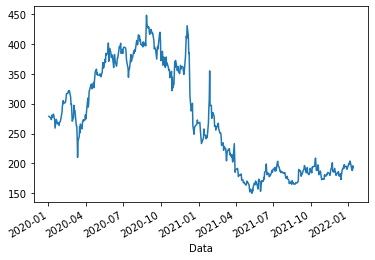

In [3]:
df.Zamkniecie.plot()

In [6]:
N = 20
line_ma = df.Zamkniecie.rolling(N).mean()
line_std = df.Zamkniecie.rolling(N).std()

In [7]:
line_up = line_ma + 2*line_std
line_down = line_ma - 2*line_std

In [12]:
df["wst górna"] = line_up
df["wst dolna"] = line_down
df = df[ ["Zamkniecie","wst górna","wst dolna"] ]
df.head()

,Zamkniecie,wst górna,wst dolna
Data,,,
2020-01-02,278.77,NaN,NaN
2020-01-03,277.99,NaN,NaN
2020-01-07,275.85,NaN,NaN
2020-01-08,273.23,NaN,NaN
2020-01-09,280.52,NaN,NaN


In [26]:
import matplotlib.pyplot as plt

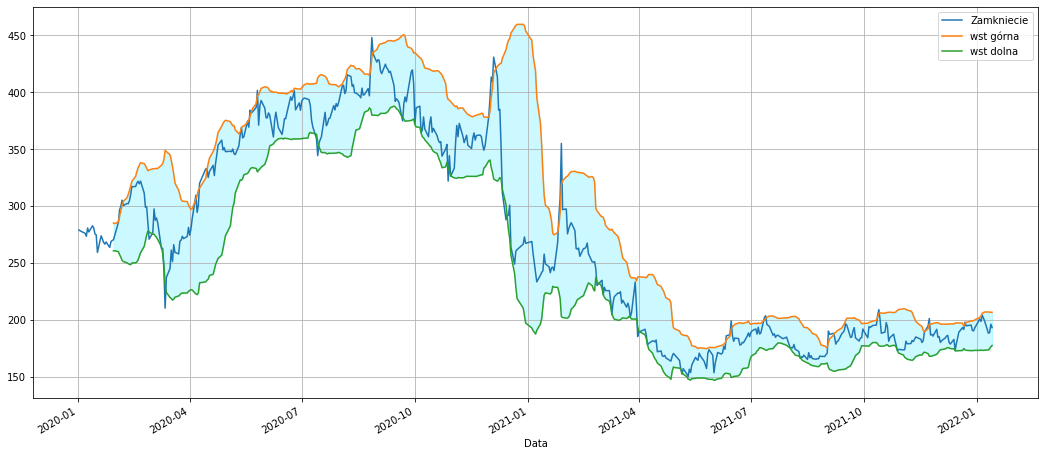

In [29]:
canvas = df.plot(figsize=(18,8), grid=True)
canvas.fill_between(df.index, df["wst dolna"], df["wst górna"], color="#00e5ff", alpha=0.2)
plt.show()

In [16]:
type(canvas)

matplotlib.axes._subplots.AxesSubplot